In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from utils import *

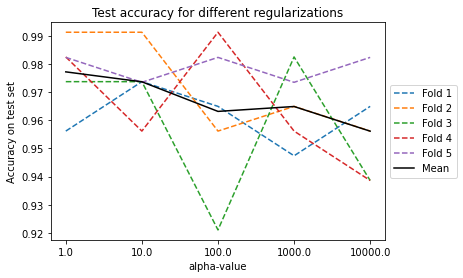

<AxesSubplot:xlabel='alpha', ylabel='Accuracy'>

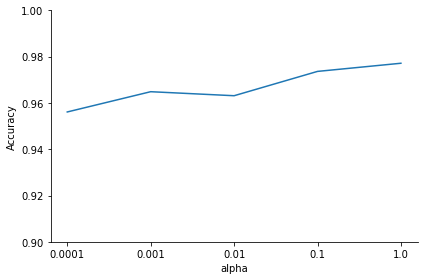

In [55]:
# Definitions
c_values = [1e0, 1e1, 1e2, 1e3, 1e4]
ksplits = 5

np.random.seed(15)

# Load dataset
dataset = load_breast_cancer()
X, y = dataset.data, dataset.target

# Cross-validation 
kfold = KFold(n_splits=ksplits, shuffle=True)

# Iterate over folds and c values
accs = []
for c in c_values:
    
    folds_acc = []
    for fold, (train_ind, test_ind) in enumerate(kfold.split(X)):

        # Get train and test data for this fold
        X_train , X_test = X[train_ind], X[test_ind]
        y_train, y_test = y[train_ind], y[test_ind]

        # Scale data
        scaler = StandardScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Instantiate svm classifier
        clf = svm.SVC(C=c, random_state=2)

        # Fit to data
        clf.fit(X_train_scaled, y_train)

        # Predict on test set
        y_hat = clf.predict(X_test_scaled)
        
        # Determine accuracy
        acc = np.mean(y_hat == y_test)    
        folds_acc.append(acc)
        
    accs.append(folds_acc)

# To compare with logistic regression, the c-values (regularization parameter) are inversed.
# Acc. to sklearn: alpha = 1/C
alpha_values = [1/c for c in c_values]
alpha_values.reverse()

fix, ax = plt.subplots()
accs = np.array(accs).T
for i, acc in enumerate(accs):
    ax.plot(acc, '--', label='Fold {}'.format(i+1))
ax.plot(np.mean(accs, axis=0), 'black', label='Mean')
ax.set_title('Test accuracy for different regularizations')
ax.set_xlabel('alpha-value')
ax.set_ylabel('Accuracy on test set')
ax.set_xticks(np.arange(len(c_values)), c_values)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Plot to save
plot_metric(y=np.flip(np.mean(accs, axis=0)), x=np.arange(len(alpha_values)), nx_ticks=alpha_values, save=True, x_label='alpha', y_label='Accuracy', 
           name='h_test_accuracy', y_limit=[0.9, 1])

